
# Time Series Analysis and Forecasting - Lecture Notes and Practical Examples

## Introduction

Time series forecasting involves predicting future values based on previously observed values. It is widely used in fields like finance, economics, weather forecasting, and demand prediction.

### Concepts
- **Time Series**: A sequence of data points recorded at regular time intervals.
- **Forecasting**: Predicting future values of the time series.
- **Univariate Time Series**: Single variable measured over time.
- **Multivariate Time Series**: Multiple variables measured over time.





## Introduction to Machine Learning for Time Series

### Why Machine Learning for Time Series?
Traditional statistical models (ARIMA, Exponential Smoothing) work well for linear problems. However, machine learning methods can capture complex, non-linear relationships by learning patterns from data.

---

### Basic ML Introduction

#### Regression for Forecasting
Regression is a supervised learning technique that models the relationship between a dependent variable and one or more independent variables. In time series, past values can be treated as independent variables (features).

#### Feature Engineering for Time Series
- **Lag Features**: Previous values in the series used as predictors.
- **Rolling Statistics**: Moving averages, rolling standard deviations.
- **Time-based Features**: Day of week, month, holiday indicators.

---


### Practical Session: Simple Regression Models in Python (scikit-learn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

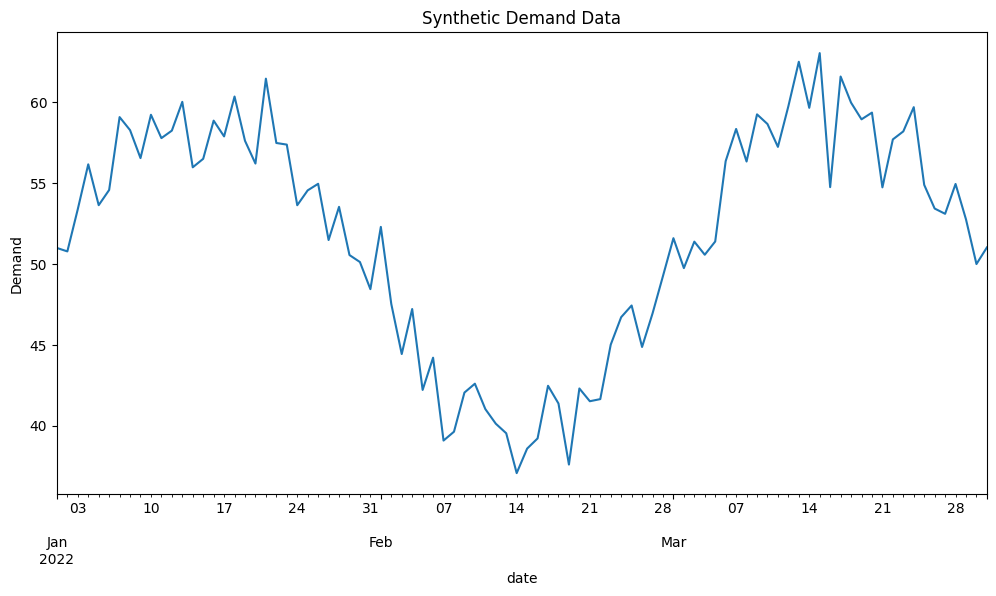

In [13]:
# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-03-31', freq='D')
demand = 50 + np.sin(np.linspace(0, 3 * np.pi, len(date_rng))) * 10 + np.random.normal(0, 2, len(date_rng))

df = pd.DataFrame(date_rng, columns=['date'])
df['demand'] = demand
df.set_index('date', inplace=True)

# Plot the data
df['demand'].plot(figsize=(12, 6), title='Synthetic Demand Data')
plt.ylabel('Demand')
plt.show()


In [17]:

# Feature Engineering
df['lag1'] = df['demand'].shift(1)
df['lag2'] = df['demand'].shift(2)

df.dropna(inplace=True)

# Train/Test split
train = df.iloc[:-20]
test = df.iloc[-20:]

X_train = train[['lag1', 'lag2']]
y_train = train['demand']
X_test = test[['lag1', 'lag2']]
y_test = test['demand']


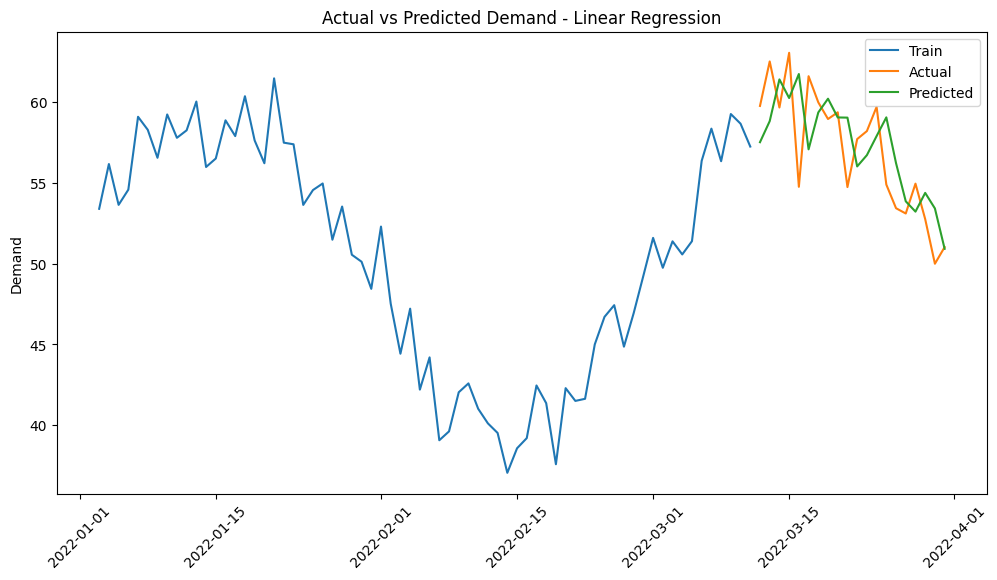

In [18]:

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['demand'], label='Train')
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Demand - Linear Regression')
plt.ylabel('Demand')
plt.xticks(rotation=45)
plt.show()


In [19]:

# Evaluate Model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')


MSE: 8.53
MAE: 2.40



## Introduction to Deep Learning for Time Series

### Why Deep Learning?
Deep learning models, especially Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks, excel in modeling sequential data by capturing temporal dependencies.

### Intro to LSTMs
LSTMs are a special kind of RNN capable of learning long-term dependencies. They are effective in time series forecasting, where long-range patterns and context matter.




In [20]:

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['demand']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

# Train/Test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


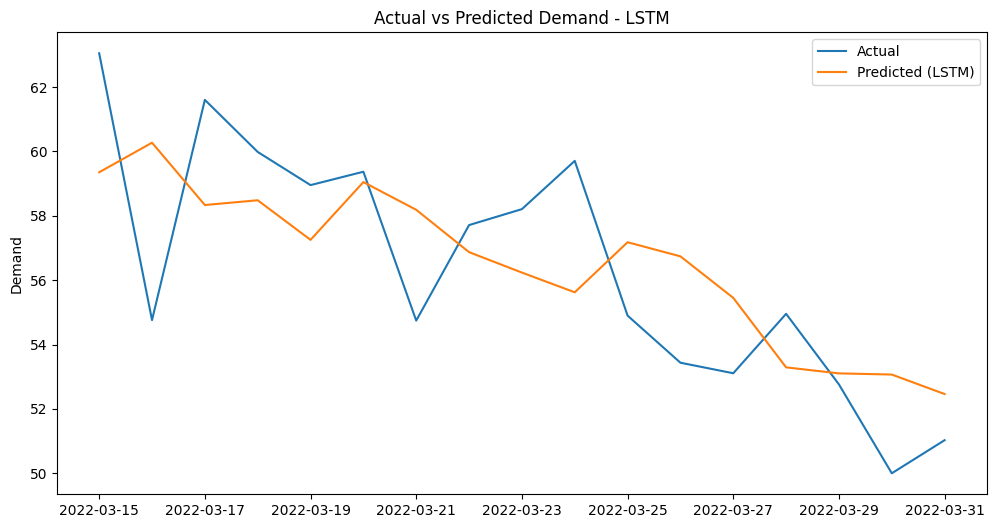

In [21]:

# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, verbose=0)

# Make predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual')
plt.plot(df.index[-len(y_test):], lstm_predictions, label='Predicted (LSTM)')
plt.legend()
plt.title('Actual vs Predicted Demand - LSTM')
plt.ylabel('Demand')
plt.show()



## Evaluating Forecasts

### Metrics for Evaluation
- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
- **Mean Absolute Error (MAE)**: Measures the average absolute difference.
- **Root Mean Squared Error (RMSE)**: Square root of MSE, interpretable in the same units as the data.

### Visual Evaluation
Plotting actual vs predicted values helps identify trends, seasonality, and deviations.

---


In [22]:

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, predictions)
lr_mae = mean_absolute_error(y_test, predictions)

# Evaluate LSTM
true_values = scaler.inverse_transform(y_test)
lstm_mse = mean_squared_error(true_values, lstm_predictions)
lstm_mae = mean_absolute_error(true_values, lstm_predictions)

print(f'Linear Regression - MSE: {lr_mse:.2f}, MAE: {lr_mae:.2f}')
print(f'LSTM - MSE: {lstm_mse:.2f}, MAE: {lstm_mae:.2f}')


ValueError: Found input variables with inconsistent numbers of samples: [17, 20]

ValueError: x and y must have same first dimension, but have shapes (20,) and (17, 1)

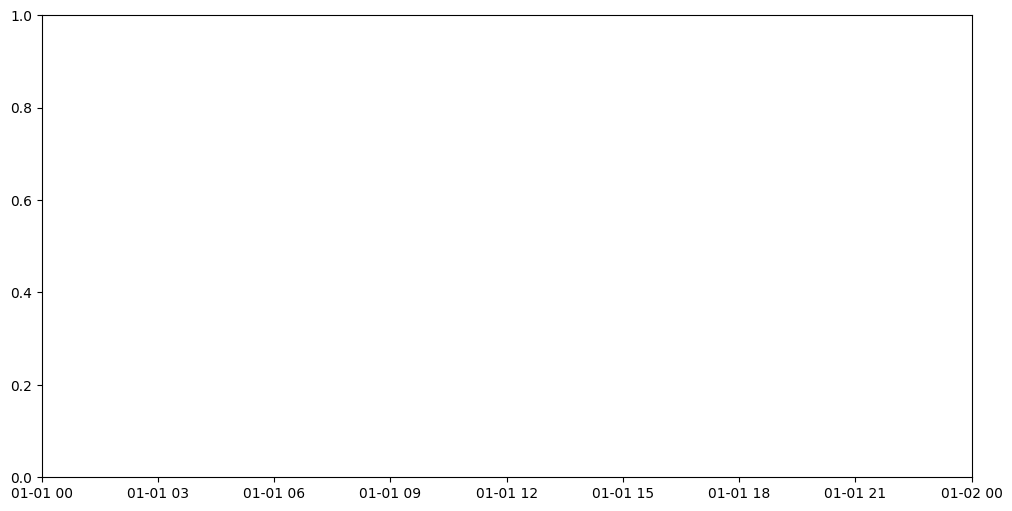

In [23]:

# Case Study: Comparing Two Forecasting Methods
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, predictions, label='Predicted (Linear Regression)')
plt.plot(df.index[-len(y_test):], lstm_predictions, label='Predicted (LSTM)')
plt.legend()
plt.title('Comparison of Forecasting Methods')
plt.ylabel('Demand')
plt.show()



## Assignment

Evaluate and compare forecasting models on a given dataset.

### Tasks
1. Load a time series dataset.
2. Implement two forecasting models (Linear Regression and LSTM).
3. Evaluate both models using MSE and MAE.
4. Plot actual vs predicted values.
5. Analyze the performance and explain differences.

---


In [3]:
data = pd.read_csv('TEST2.csv')
data.head(10)

,DATE,SALE
0,2020-01-01,200
1,2020-02-01,220
2,2020-03-01,210
3,2020-04-01,230
4,2020-05-01,250
5,2020-06-01,270
6,2020-07-01,260
7,2020-08-01,280
8,2020-09-01,300
9,2020-10-01,310


In [4]:
# Convert DATE column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Set DATE as index
data.set_index('DATE', inplace=True)

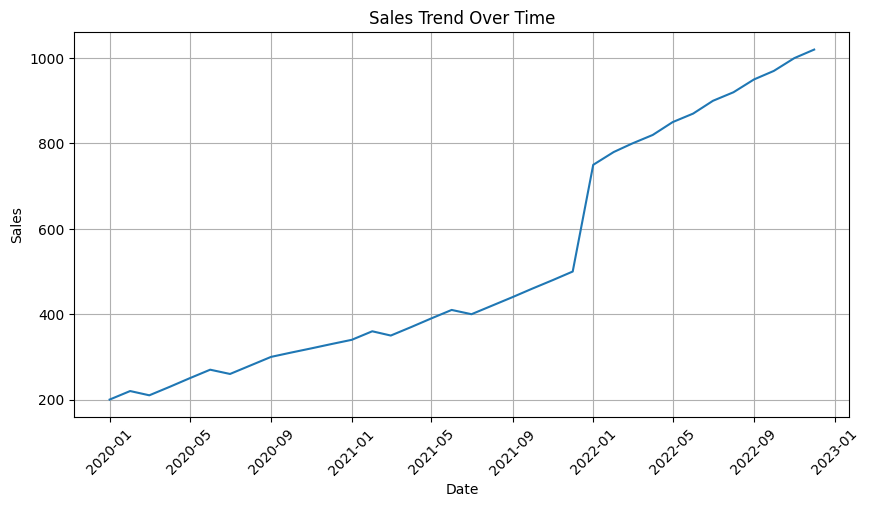

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(data.index,data['SALE'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Using Linear regression
--- 

In [6]:
# Feature Engineering
data['lag1'] = data['SALE'].shift(1)
data['lag2'] = data['SALE'].shift(2)

data.dropna(inplace=True)

# Train/Test split
train = data.iloc[:-20]
test = data.iloc[-20:]

X_train = train[['lag1', 'lag2']]
y_train = train['SALE']
X_test = test[['lag1', 'lag2']]
y_test = test['SALE']

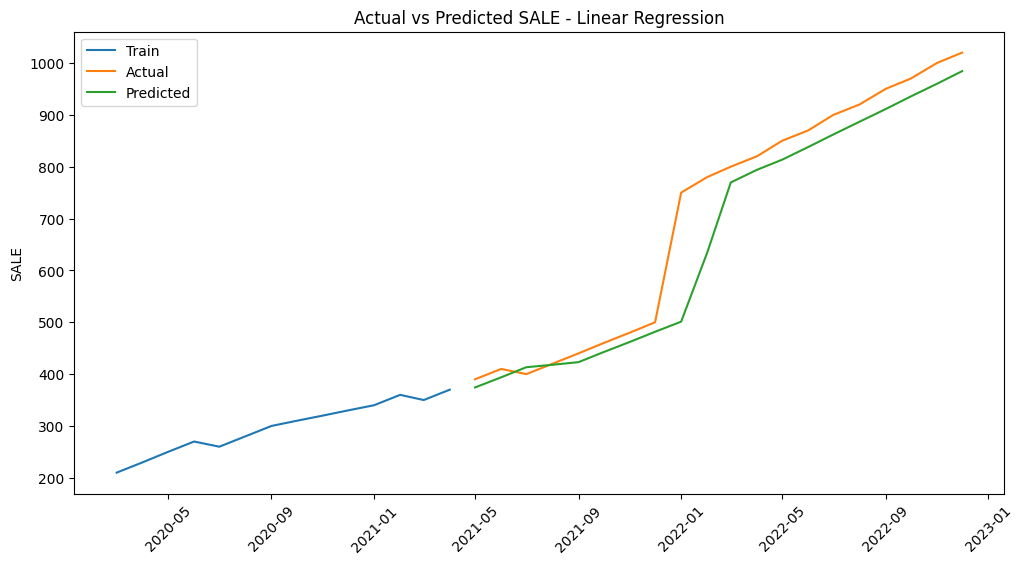

In [7]:

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['SALE'], label='Train')
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted SALE - Linear Regression')
plt.ylabel('SALE')
plt.xticks(rotation=45)
plt.show()


In [8]:

# Evaluate Model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')


MSE: 4857.59
MAE: 42.88


## Using LSTM 
--- 

In [32]:



# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['SALE']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y).reshape(-1, 1)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

# Expand dimensions for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

# Train/Test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1846
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.1786
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.1727
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1670
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.1613
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.1558
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.1505
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1452
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1401
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1351
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.1303
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 0.1256
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 0.1211
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.1166
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - loss: 0.1123
Epoch 16/50
1/1 ━━━━━━

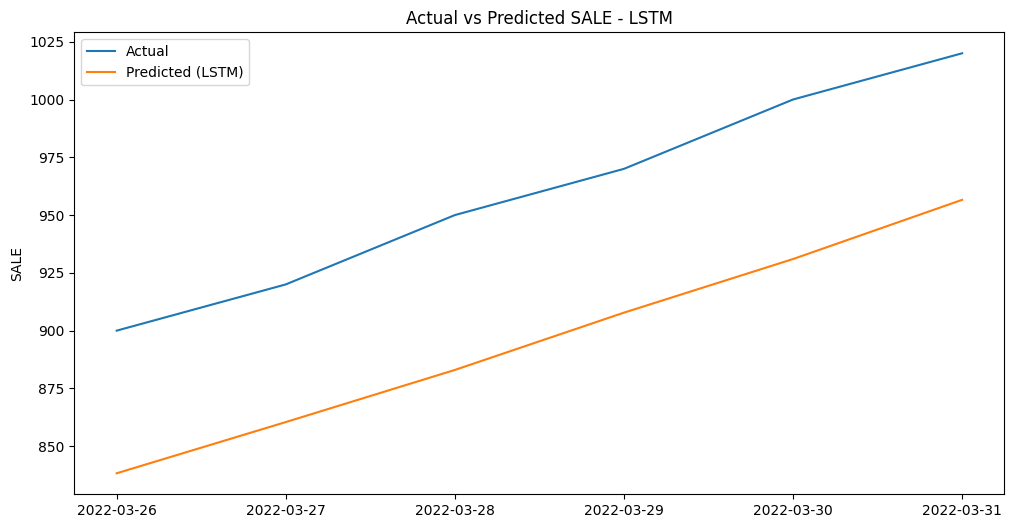

In [34]:
# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, verbose=1)

# Make predictions
lstm_predictions = model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_inv, label='Actual')
plt.plot(df.index[-len(y_test):], lstm_predictions, label='Predicted (LSTM)')
plt.legend()
plt.title('Actual vs Predicted SALE - LSTM')
plt.ylabel('SALE')
plt.show()


In [35]:
# Evaluate LSTM
true_values = scaler.inverse_transform(y_test)
lstm_mse = mean_squared_error(true_values, lstm_predictions)
lstm_mae = mean_absolute_error(true_values, lstm_predictions)

print(f'LSTM - MSE: {lstm_mse:.2f}, MAE: {lstm_mae:.2f}')


LSTM - MSE: 4083.23, MAE: 63.82
